
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '400109265'
first_name = 'Yahya'
last_name = 'Tehrani'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [2]:
import pandas as pd

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [4]:
# Load the dataset
spotify_df = pd.read_csv('spotify.csv')

# Display the first few rows to understand the structure
print(spotify_df.head())

# Select relevant features for clustering
selected_features = ['track_id','track_artist','track_popularity','track_album_id','track_album_name','track_album_release_date','playlist_name','playlist_id','playlist_genre','playlist_subgenre','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']

# Also include track_name for identification after clustering
spotify_selected = spotify_df[['track_name'] + selected_features]

# Display the selected data to verify
print(spotify_selected.head())


                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [6]:
# TODO: Write your code here
from sklearn.preprocessing import LabelEncoder

# Function to compute standard scaling
def standard_scaler(data):
    scaled_data = (data - data.mean()) / data.std()
    return scaled_data

# Apply standard scaling to numerical features (excluding track_name)
numerical_features = ['danceability', 'energy', 'key', 'loudness', 
                      'speechiness', 'acousticness', 'instrumentalness', 
                      'liveness', 'valence', 'tempo', 'duration_ms']

spotify_selected[numerical_features] = standard_scaler(spotify_selected[numerical_features])

# Use LabelEncoder for categorical variables if needed
label_encoder = LabelEncoder()
spotify_selected['track_name_encoded'] = label_encoder.fit_transform(spotify_selected['track_name'])

# Display the scaled and encoded data
print(spotify_selected.head())

                                          track_name                track_id  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...  6f807x0ima9a1j3VPbc7VN   
1                    Memories - Dillon Francis Remix  0r7CVbZTWZgbTCYdfa2P31   
2                    All the Time - Don Diablo Remix  1z1Hg7Vb0AhHDiEmnDE79l   
3                  Call You Mine - Keanu Silva Remix  75FpbthrwQmzHlBJLuGdC7   
4            Someone You Loved - Future Humans Remix  1e8PAfcKUYoKkxPhrHqw4x   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

Number of principal components to retain: 11


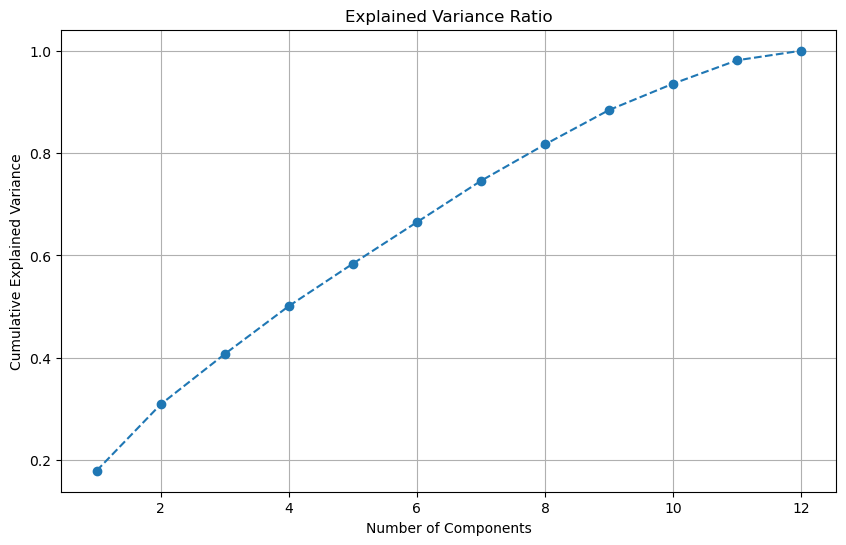

In [8]:
# TODO: Write your code here
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
spotify_df = pd.read_csv('spotify.csv')

# Select relevant features for clustering
selected_features = ['danceability', 'energy', 'key', 'loudness', 
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

# Create a DataFrame with selected features
spotify_selected = spotify_df[selected_features]

# Standardize the features
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_selected)

# Apply PCA
pca = PCA()
spotify_pca = pca.fit_transform(spotify_scaled)

# Analyze explained variance ratio to determine number of components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Determine the number of components to retain
num_components_retained = 0
for i, variance in enumerate(cumulative_variance):
    if variance >= 0.95:  # Adjust this threshold as per your requirement
        num_components_retained = i + 1
        break

print(f"Number of principal components to retain: {num_components_retained}")

# Optionally, you can also plot explained variance to visualize the contribution of each component
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()


# Clustering

Implement K-means for clustering from scratch.

In [10]:
# TODO: Write your code here
import numpy as np

class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X):
        self.centroids = self._init_random_centroids(X)
        
        for _ in range(self.max_iter):
            # Assign points to closest centroids
            labels = self._assign_clusters(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.allclose(new_centroids, self.centroids):
                break
            
            self.centroids = new_centroids
        
        self.labels_ = self._assign_clusters(X)
        return self
    
    def _init_random_centroids(self, X):
        centroids_indices = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[centroids_indices]
        return centroids
    
    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for k in range(self.n_clusters):
            new_centroids[k] = np.mean(X[labels == k], axis=0)
        return new_centroids

# Example usage:
if __name__ == "__main__":
    # Generate random data
    np.random.seed(0)
    X = np.random.rand(100, 2)
    
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)
    
    # Print cluster labels and centroids
    print("Cluster Labels:")
    print(kmeans.labels_)
    print("\nCluster Centroids:")
    print(kmeans.centroids)


Cluster Labels:
[2 0 2 2 0 0 2 1 2 2 0 2 2 2 0 2 2 2 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 2 0 1 2 2 2 1 1 0 0 2 2 0 2 2 0 0 0 0 0 0 2 1 0 0 1 0 2 0 0 2 0 2
 2 2 2 2 0 1 0 2 0 1 0 1 1 0 2 0 2 0 0 2 0 1 2 0 1 1]

Cluster Centroids:
[[0.76167338 0.40765364]
 [0.27223715 0.21097997]
 [0.35217863 0.78488734]]


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_k

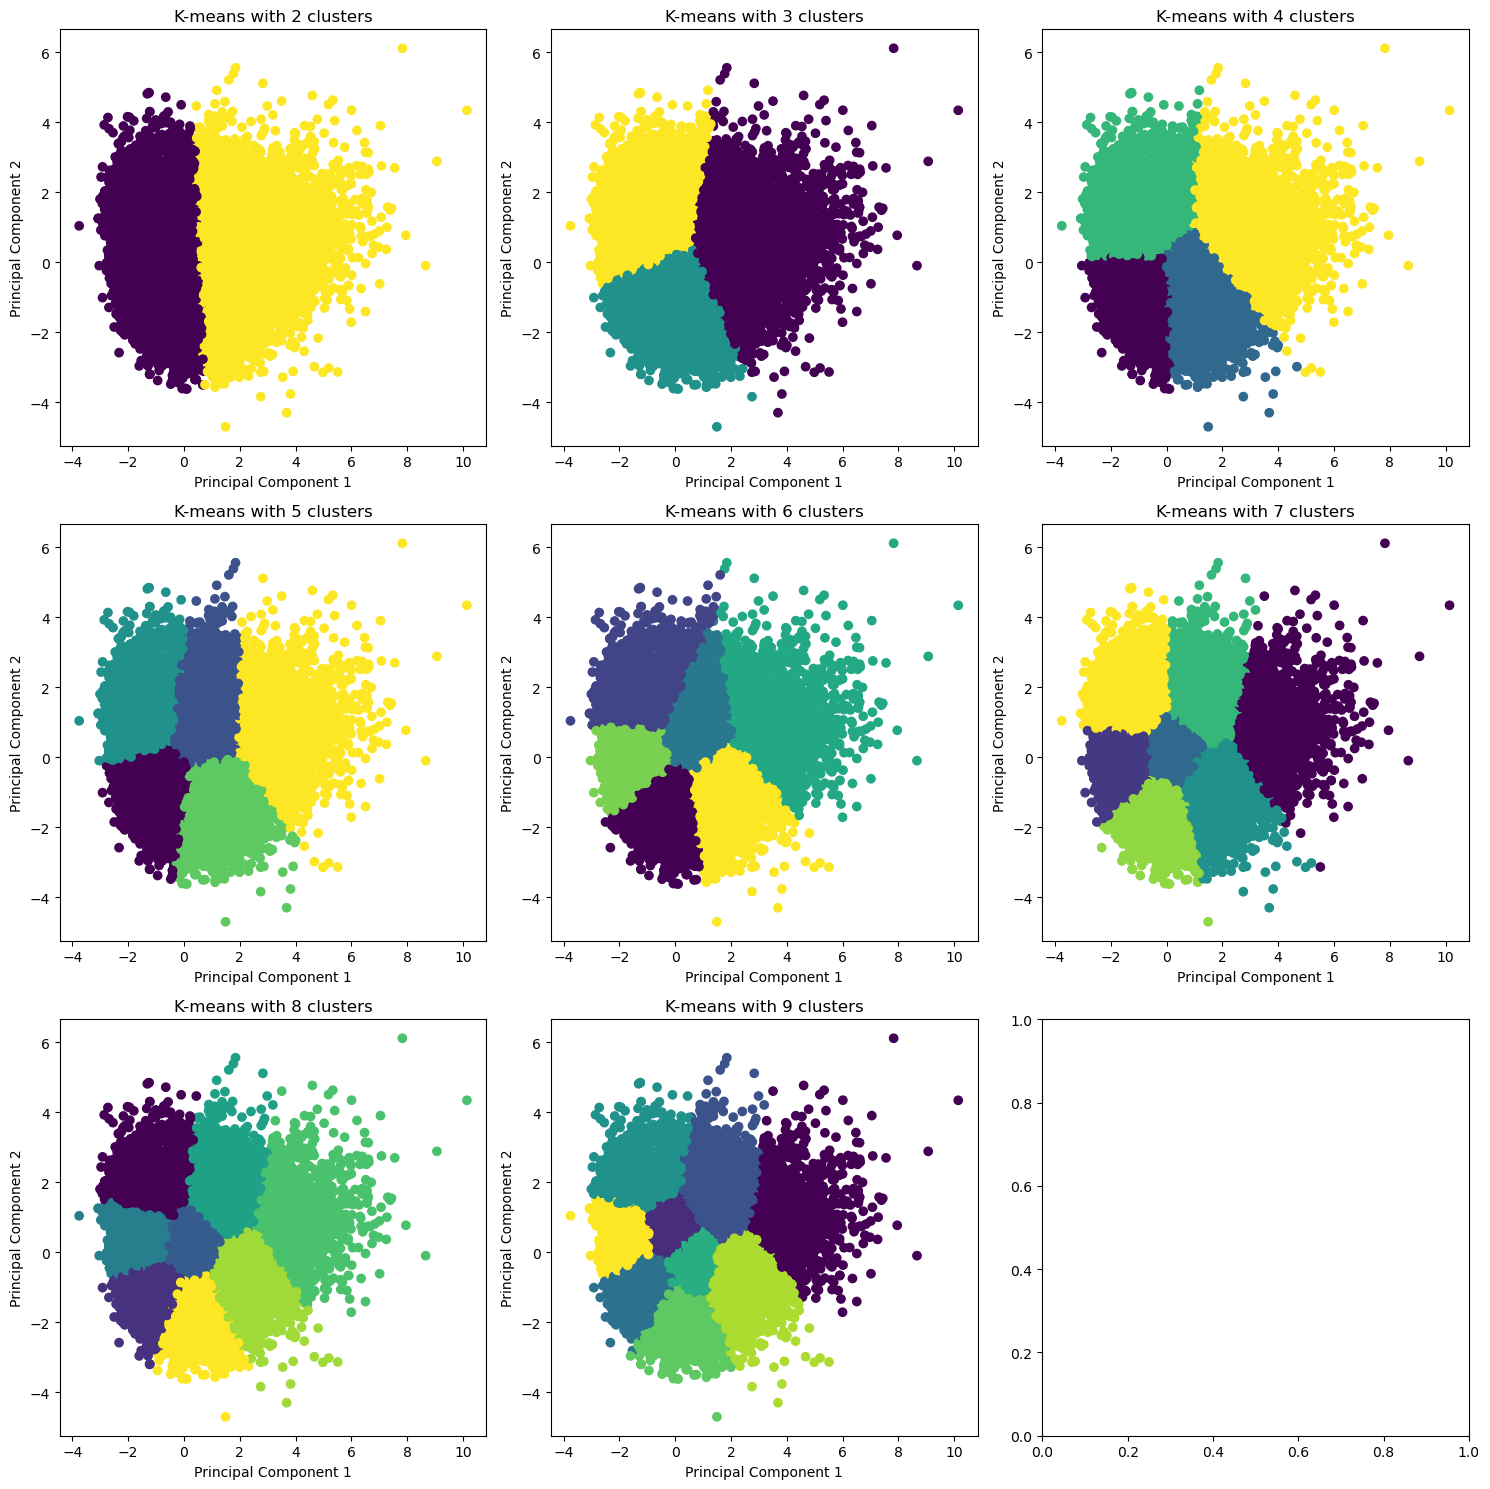

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load Spotify dataset
spotify_df = pd.read_csv('spotify.csv')

# Select relevant features for clustering
selected_features = ['danceability', 'energy', 'key', 'loudness', 
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

# Create a DataFrame with selected features
spotify_selected = spotify_df[selected_features]

# Standardize the data
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_selected)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
spotify_pca = pca.fit_transform(spotify_scaled)

# Execute K-means clustering for different number of clusters
num_clusters_range = range(2, 10)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, n_clusters in enumerate(num_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(spotify_pca)
    cluster_labels = kmeans.labels_
    
    # Plot clusters using first two principal components
    ax = axes[i]
    ax.scatter(spotify_pca[:, 0], spotify_pca[:, 1], c=cluster_labels, cmap='viridis')
    ax.set_title(f'K-means with {n_clusters} clusters')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    
plt.tight_layout()
plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_k

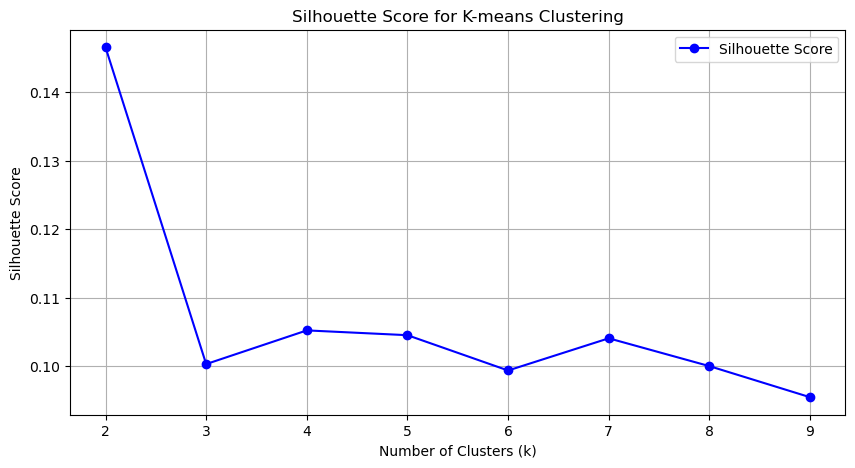

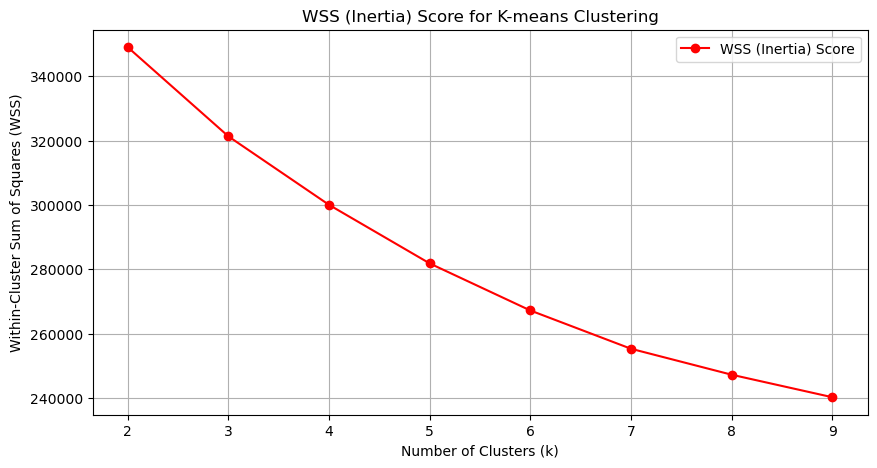

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Spotify dataset
spotify_df = pd.read_csv('spotify.csv')

# Select relevant features for clustering
selected_features = ['danceability', 'energy', 'key', 'loudness', 
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

# Create a DataFrame with selected features
spotify_selected = spotify_df[selected_features]

# Standardize the data
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_selected)

# Apply PCA to reduce dimensions to 2 for visualization (optional)
pca = PCA(n_components=2)
spotify_pca = pca.fit_transform(spotify_scaled)

# Initialize lists to store silhouette scores and WSS scores
silhouette_scores = []
wss_scores = []

# Range of k values to try
k_range = range(2, 10)

# Calculate Silhouette score and WSS score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spotify_scaled)
    
    # Silhouette score
    silhouette_avg = silhouette_score(spotify_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # WSS score (inertia)
    wss_score = kmeans.inertia_
    wss_scores.append(wss_score)

# Plotting Silhouette score
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

# Plotting WSS score
plt.figure(figsize=(10, 5))
plt.plot(k_range, wss_scores, marker='o', linestyle='-', color='r', label='WSS (Inertia) Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('WSS (Inertia) Score for K-means Clustering')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [18]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load Spotify dataset
spotify_df = pd.read_csv('spotify.csv')

# Select relevant features for clustering
selected_features = ['danceability', 'energy', 'key', 'loudness', 
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

# Create a DataFrame with selected features
spotify_selected = spotify_df[selected_features]

# Standardize the data
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_selected)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters
kmeans.fit(spotify_scaled)

# Add cluster labels to the original dataframe
spotify_df['cluster'] = kmeans.labels_

# Initialize a DataFrame to store randomly selected songs
selected_songs = pd.DataFrame(columns=spotify_df.columns)

# Randomly select two songs from each cluster
for cluster_id in range(kmeans.n_clusters):
    cluster_songs = spotify_df[spotify_df['cluster'] == cluster_id]
    selected_indices = np.random.choice(cluster_songs.index, size=2, replace=False)
    selected_songs = selected_songs.append(cluster_songs.loc[selected_indices])

# Print selected songs
print("Randomly Selected Songs from Each Cluster:")
print(selected_songs[['track_name', 'track_artist', 'cluster']])

# Calculate Euclidean distance between selected songs within each cluster (as an example)
for cluster_id in range(kmeans.n_clusters):
    cluster_songs = selected_songs[selected_songs['cluster'] == cluster_id]
    if len(cluster_songs) >= 2:
        distances = euclidean_distances(cluster_songs[selected_features])
        print(f"\nCluster {cluster_id} - Similarity between selected songs:")
        print(distances)



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Randomly Selected Songs from Each Cluster:
                                       track_name    track_artist cluster
23807                    Gold Roses (feat. Drake)       Rick Ross       0
17333                                Hablar de Ti            Gepe       0
577                                       Shy Guy  Campsite Dream       1
16973                              Mixed Feelings         Ariel T       1
5440                  Goodbyes (feat. Method Man)      The Knocks       2
265    Sweet but Psycho - Morgan Page Dance Remix         Ava Max       2
7367                                 Mutant Brain     Sam Spiegel       3
32605                              Computer Music   Hidden Empire       3
7117                             Where Ya Love At        Mr. Mike       4
8837                          The Real Slim Shady          Eminem       4

Cluster 0 - Similarity between selected songs:
[[     0.         139591.02938571]
 [139591.02938571      0.        ]]

Cluster 1 - Similarity 

C:\Users\Asus\AppData\Local\Temp\ipykernel_18816\4103302292.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_songs = selected_songs.append(cluster_songs.loc[selected_indices])
C:\Users\Asus\AppData\Local\Temp\ipykernel_18816\4103302292.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_songs = selected_songs.append(cluster_songs.loc[selected_indices])
C:\Users\Asus\AppData\Local\Temp\ipykernel_18816\4103302292.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_songs = selected_songs.append(cluster_songs.loc[selected_indices])
C:\Users\Asus\AppData\Local\Temp\ipykernel_18816\4103302292.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


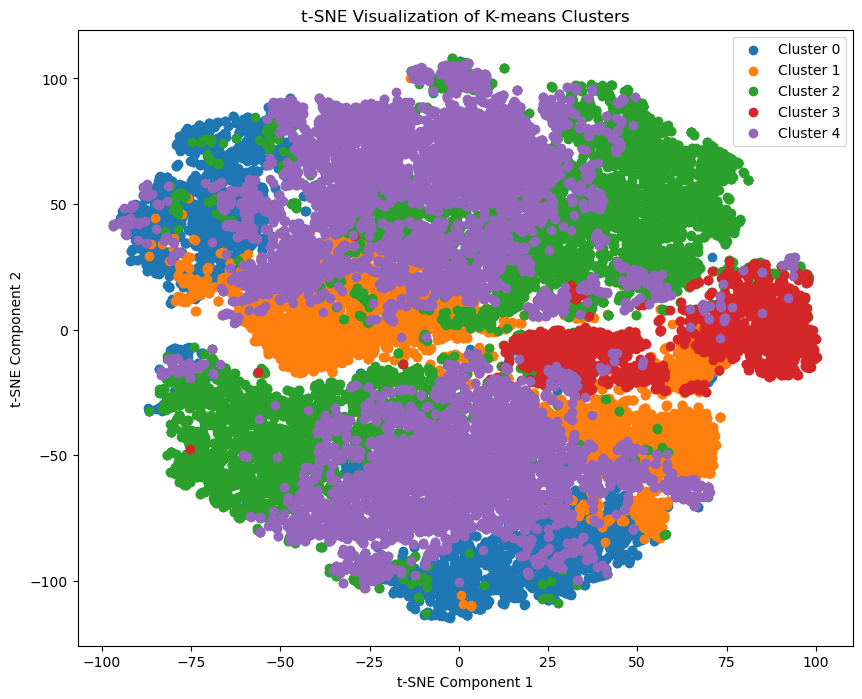

In [17]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load Spotify dataset
spotify_df = pd.read_csv('spotify.csv')

# Select relevant features for clustering
selected_features = ['danceability', 'energy', 'key', 'loudness', 
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'duration_ms']

# Create a DataFrame with selected features
spotify_selected = spotify_df[selected_features]

# Standardize the data
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_selected)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters
kmeans.fit(spotify_scaled)

# Add cluster labels to the original dataframe
spotify_df['cluster'] = kmeans.labels_

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
spotify_tsne = tsne.fit_transform(spotify_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
for cluster_id in range(kmeans.n_clusters):
    cluster_mask = spotify_df['cluster'] == cluster_id
    plt.scatter(spotify_tsne[cluster_mask, 0], spotify_tsne[cluster_mask, 1], label=f'Cluster {cluster_id}')

plt.title('t-SNE Visualization of K-means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()
